In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
file_path = "C:\\Users\\DeLL\\Desktop\\inventory_data.csv"
df = pd.read_csv(file_path)
print(df)

     Inventory    Wastage      Cost
0           35  12.231925  260.0425
1           26   5.125732  113.5064
2           13   0.695059   24.6853
3           34  11.234308  240.5176
4           35  12.231925  256.0425
..         ...        ...       ...
295         16   1.257772   39.2444
296         42  20.910756  429.4792
297         20   2.392300   68.8300
298         11   0.433117   22.8409
299         46  27.343252  548.2504

[300 rows x 3 columns]


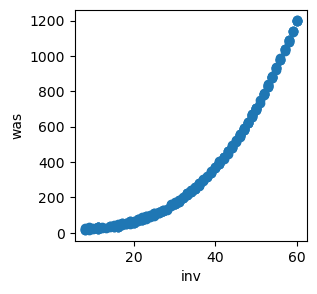

In [7]:
plt.figure(figsize=(3,3))
plt.scatter(df.Inventory, df.Cost)
plt.xlabel('inv')
plt.ylabel('was')
plt.show()

In [8]:
# Step 1: Train-Test Split
X = df[['Inventory']]  # IV: Independent Variable(s)
y = df['Cost']    # DV: Dependent Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Polynomial Regression
# You can change the degree of the polynomial if needed
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Step 3: Predictions and RMSE Calculation
# Predict on the test set
y_pred = poly_reg.predict(X_test_poly)
y_pred2 = poly_reg.predict(X_train_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred2))
print("Train Root Mean Squared Error (RMSE):", rmse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Root Mean Squared Error (RMSE):", rmse)

Train Root Mean Squared Error (RMSE): 4.810133247540177
Test Root Mean Squared Error (RMSE): 5.236574667941064


## Ridge

In [10]:
rdg = Ridge(alpha = 0.5)
rdg = rdg.fit(X_train, y_train)
predictions = rdg.predict(X_test)
print(rdg.score(X_train, y_train))
print(rdg.coef_)
print(rdg.intercept_)

0.8920086925829973
[22.39224556]
-404.77474137674784


In [ ]:
print("")